In [13]:
import pandas as pd
from sklearn import tree

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

from imblearn.under_sampling import RandomUnderSampler

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = pd.read_csv('/content/drive/MyDrive/CodeOp/model_data.csv')

In [4]:
data['STATE'] = data['STATE'].astype('category')
data['STATE'] = data['STATE'].cat.codes.astype(int)

In [5]:
data['COUNTY_STATE'] = data['COUNTY_STATE'].astype('category')
data['COUNTY_STATE'] = data['COUNTY_STATE'].cat.codes.astype(int)

In [ ]:
data.columns

Index(['FIRE_YEAR', 'NWCG_GENERAL_CAUSE', 'FIRE_SIZE', 'DURATION', 'STATE',
       'PRECIPITATION', 'TEMPERATURE', 'WIND_SPEED', 'ELEVATION',
       'DAY_OF_WEEK', 'DAY_OF_YEAR', 'COUNTY_STATE',
       'NWCG_REPORTING_AGENCY = _Bureau of Indian Affairs',
       'NWCG_REPORTING_AGENCY = _Bureau of Land Management',
       'NWCG_REPORTING_AGENCY = _Bureau of Reclamation',
       'NWCG_REPORTING_AGENCY = _Department of Defense',
       'NWCG_REPORTING_AGENCY = _Department of Energy',
       'NWCG_REPORTING_AGENCY = _Fish and Wildlife Service',
       'NWCG_REPORTING_AGENCY = _Forest Service',
       'NWCG_REPORTING_AGENCY = _Interagency Organization',
       'NWCG_REPORTING_AGENCY = _National Park Service',
       'NWCG_REPORTING_AGENCY = _State, County, or Local Organization',
       'NWCG_REPORTING_AGENCY = _Tribal Organization',
       'NWCG_CAUSE_CLASSIFICATION = _Human',
       'NWCG_CAUSE_CLASSIFICATION = _Natural',
       'NWCG_CAUSE_CLASSIFICATION = _undetermined',
       'NWCG_CA

# Initial Decision Tree:


*   Leaving columns as-is
*   Leaving 'state' / 'county_state' as text
*   Data without normalisation



In [ ]:
X = data.drop("NWCG_GENERAL_CAUSE", axis=1)
y = data["NWCG_GENERAL_CAUSE"]


X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, shuffle=True, random_state=2)

In [ ]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_predictions = lr.predict(X_test)
lr_acc = accuracy_score(y_test, lr_predictions)
print(f"Logistic Regression Accuracy Score: {lr_acc}")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy Score: 0.3507752571559341


In [ ]:
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
dt_predictions = dt.predict(X_test)
dt_acc = accuracy_score(y_test, dt_predictions)
print(f"Decision Tree Accuracy Score: {dt_acc}")

Decision Tree Accuracy Score: 0.5702783911742241


In [ ]:
predictions = pd.DataFrame({"Actual":y_test, "LR":lr_predictions, "DT":dt_predictions})

In [ ]:
predictions.head(30)

,Actual,LR,DT
499082,Debris and open burning,Debris and open burning,Debris and open burning
434482,Debris and open burning,Debris and open burning,Debris and open burning
407895,Equipment and vehicle use,Debris and open burning,Debris and open burning
539825,Arson,Debris and open burning,Arson
1562135,Debris and open burning,Debris and open burning,Debris and open burning
1411482,Undetermined,Undetermined,Undetermined
1049178,Undetermined,Debris and open burning,Debris and open burning
205962,Equipment and vehicle use,Undetermined,Undetermined
683582,Smoking,Undetermined,Recreation and ceremony
1215754,Debris and open burning,Debris and open burning,Equipment and vehicle use


In [ ]:
report = classification_report(y_test, dt_predictions, output_dict=True)
report_df = pd.DataFrame(report).transpose()

In [ ]:
report_df

,precision,recall,f1-score,support
Arson,0.428350,0.442870,0.435489,43751.000000
Debris and open burning,0.538075,0.525197,0.531558,81638.000000
Equipment and vehicle use,0.294260,0.300508,0.297351,28352.000000
Firearms and explosives use,0.430279,0.426036,0.428147,507.000000
Fireworks,0.414604,0.436346,0.425197,3032.000000
Misuse of fire by a minor,0.967046,0.963655,0.965348,8557.000000
Natural,1.000000,1.000000,1.000000,46359.000000
Other causes,0.090694,0.095745,0.093151,1598.000000
Power supply,0.157525,0.158880,0.158200,5929.000000
Railroad operations and maintenance,0.321429,0.345244,0.332911,3806.000000


In [ ]:
feature_importances = pd.DataFrame(
    dt.feature_importances_,
    index =X_train.columns,
    columns=['importance']
).sort_values('importance', ascending=False)

In [ ]:
feature_importances

,importance
NWCG_CAUSE_CLASSIFICATION = _Natural,0.178651
TEMPERATURE,0.091200
WIND_SPEED,0.091096
DAY_OF_YEAR,0.089029
FIRE_SIZE,0.082242
ELEVATION,0.067980
FIRE_YEAR,0.059813
STATE,0.058029
COUNTY_STATE,0.054371
NWCG_CAUSE_CLASSIFICATION = _Human,0.053421


# Doing the same models but with normalised data...

Trying the exact same with normalised data - will just do the overall accuracy score & report

In [ ]:
# Same on original data
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
dt_predictions = dt.predict(X_test)
dt_acc = accuracy_score(y_test, dt_predictions)
print(f"Decision Tree Accuracy Score: {dt_acc}")

Decision Tree Accuracy Score: 0.5702754191322231


In [ ]:
scaler = StandardScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

In [ ]:
# Same on original data
dt = DecisionTreeClassifier()
dt.fit(X_train_normalized,y_train)
dt_pred_normalized = dt.predict(X_test_normalized)
dt_acc = accuracy_score(y_test, dt_pred_normalized)
print(f"Decision Tree Accuracy Score: {dt_acc}")

Decision Tree Accuracy Score: 0.570947100624426


# Testing with updated data

Updates to data:
* Removed 'NWCG_CAUSE_CLASSIFICATION'
* Removed 'NWCG_CAUSE_AGE_CATEGORY'
* Combined 'Undetermined' and 'other causes'

In [ ]:
data_update = data

data_update = data_update.drop(['NWCG_CAUSE_CLASSIFICATION = _Human', 'NWCG_CAUSE_CLASSIFICATION = _Natural', 'NWCG_CAUSE_CLASSIFICATION = _undetermined',
                                      'NWCG_CAUSE_AGE_CATEGORY = _Adult or Natural', 'NWCG_CAUSE_AGE_CATEGORY = _Minor'], axis=1)

data_update['NWCG_GENERAL_CAUSE'] = data_update['NWCG_GENERAL_CAUSE'].replace({'Other causes': 'Undetermined', 'Undetermined': 'Undetermined'})
# data_update['NWCG_GENERAL_CAUSE'] = data_update['NWCG_GENERAL_CAUSE'].replace({'Railroad operations and maintenance': 'Infrastructure-related causes',
#                                                                                'Power supply': 'Infrastructure-related causes',
#                                                                                'Equipment and vehicle use': 'Infrastructure-related causes'})

In [ ]:
data_update['NWCG_GENERAL_CAUSE'].value_counts()

Undetermined                           461666
Debris and open burning                405877
Natural                                231547
Arson                                  219102
Equipment and vehicle use              141487
Recreation and ceremony                 69984
Misuse of fire by a minor               43018
Smoking                                 42540
Power supply                            29661
Railroad operations and maintenance     19660
Fireworks                               15376
Firearms and explosives use              2423
Name: NWCG_GENERAL_CAUSE, dtype: int64

In [ ]:
data_update.columns

Index(['FIRE_YEAR', 'NWCG_GENERAL_CAUSE', 'FIRE_SIZE', 'DURATION', 'STATE',
       'PRECIPITATION', 'TEMPERATURE', 'WIND_SPEED', 'ELEVATION',
       'DAY_OF_WEEK', 'DAY_OF_YEAR', 'COUNTY_STATE',
       'NWCG_REPORTING_AGENCY = _Bureau of Indian Affairs',
       'NWCG_REPORTING_AGENCY = _Bureau of Land Management',
       'NWCG_REPORTING_AGENCY = _Bureau of Reclamation',
       'NWCG_REPORTING_AGENCY = _Department of Defense',
       'NWCG_REPORTING_AGENCY = _Department of Energy',
       'NWCG_REPORTING_AGENCY = _Fish and Wildlife Service',
       'NWCG_REPORTING_AGENCY = _Forest Service',
       'NWCG_REPORTING_AGENCY = _Interagency Organization',
       'NWCG_REPORTING_AGENCY = _National Park Service',
       'NWCG_REPORTING_AGENCY = _State, County, or Local Organization',
       'NWCG_REPORTING_AGENCY = _Tribal Organization',
       'OWNER_DESCR = _BUREAU OF INDIAN AFFAIRS',
       'OWNER_DESCR = _BUREAU OF LAND MANAGEMENT',
       'OWNER_DESCR = _BUREAU OF RECLAMATION', 'OWNER_DESC

In [ ]:
X2 = data_update.drop("NWCG_GENERAL_CAUSE", axis=1)
y2 = data_update["NWCG_GENERAL_CAUSE"]


X2_train, X2_test, y2_train, y2_test = train_test_split(X2,y2, test_size=0.2, shuffle=True, random_state=2)

In [ ]:
X2_train.columns

Index(['FIRE_YEAR', 'FIRE_SIZE', 'DURATION', 'STATE', 'PRECIPITATION',
       'TEMPERATURE', 'WIND_SPEED', 'ELEVATION', 'DAY_OF_WEEK', 'DAY_OF_YEAR',
       'COUNTY_STATE', 'NWCG_REPORTING_AGENCY = _Bureau of Indian Affairs',
       'NWCG_REPORTING_AGENCY = _Bureau of Land Management',
       'NWCG_REPORTING_AGENCY = _Bureau of Reclamation',
       'NWCG_REPORTING_AGENCY = _Department of Defense',
       'NWCG_REPORTING_AGENCY = _Department of Energy',
       'NWCG_REPORTING_AGENCY = _Fish and Wildlife Service',
       'NWCG_REPORTING_AGENCY = _Forest Service',
       'NWCG_REPORTING_AGENCY = _Interagency Organization',
       'NWCG_REPORTING_AGENCY = _National Park Service',
       'NWCG_REPORTING_AGENCY = _State, County, or Local Organization',
       'NWCG_REPORTING_AGENCY = _Tribal Organization',
       'OWNER_DESCR = _BUREAU OF INDIAN AFFAIRS',
       'OWNER_DESCR = _BUREAU OF LAND MANAGEMENT',
       'OWNER_DESCR = _BUREAU OF RECLAMATION', 'OWNER_DESCR = _COUNTY',
       'OWNER_D

In [ ]:
lr2 = LogisticRegression()
lr2.fit(X2_train, y2_train)
lr2_predictions = lr2.predict(X2_test)
lr2_acc = accuracy_score(y2_test, lr2_predictions)
print(f"Logistic Regression Accuracy Score: {lr2_acc}")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy Score: 0.3511824269100571


In [ ]:
# Original Decision Tree Accuracy Score: 0.5702754191322231
dt2 = DecisionTreeClassifier()
dt2.fit(X2_train,y2_train)
dt2_predictions = dt2.predict(X2_test)
dt2_acc = accuracy_score(y2_test, dt2_predictions)
print(f"Decision Tree Accuracy Score: {dt2_acc}")

Decision Tree Accuracy Score: 0.47348789933099333


In [ ]:
predictions2 = pd.DataFrame({"Actual":y2_test, "LR":lr2_predictions,
                             "DT":dt_predictions, "DT2":dt2_predictions})
predictions2.head(30)

,Actual,LR,DT,DT2
499082,Debris and open burning,Debris and open burning,Debris and open burning,Debris and open burning
434482,Debris and open burning,Debris and open burning,Debris and open burning,Debris and open burning
407895,Equipment and vehicle use,Debris and open burning,Debris and open burning,Debris and open burning
539825,Arson,Debris and open burning,Arson,Arson
1562135,Debris and open burning,Debris and open burning,Debris and open burning,Debris and open burning
1411482,Undetermined,Undetermined,Undetermined,Undetermined
1049178,Undetermined,Debris and open burning,Debris and open burning,Debris and open burning
205962,Equipment and vehicle use,Undetermined,Undetermined,Undetermined
683582,Smoking,Undetermined,Recreation and ceremony,Natural
1215754,Debris and open burning,Debris and open burning,Equipment and vehicle use,Debris and open burning


In [ ]:
report2 = classification_report(y2_test, dt2_predictions, output_dict=True)
report2_df = pd.DataFrame(report2).transpose()

In [ ]:
report2_df

,precision,recall,f1-score,support
Arson,0.410154,0.426710,0.418269,43751.000000
Debris and open burning,0.506727,0.496901,0.501766,81638.000000
Equipment and vehicle use,0.255882,0.263932,0.259844,28352.000000
Firearms and explosives use,0.440574,0.424063,0.432161,507.000000
Fireworks,0.338063,0.361478,0.349378,3032.000000
Misuse of fire by a minor,0.141137,0.149351,0.145128,8557.000000
Natural,0.706465,0.701482,0.703965,46359.000000
Power supply,0.134014,0.139484,0.136694,5929.000000
Railroad operations and maintenance,0.308119,0.336048,0.321478,3806.000000
Recreation and ceremony,0.289084,0.285602,0.287333,14030.000000


In [ ]:
feature_importances2 = pd.DataFrame(
    dt2.feature_importances_,
    index =X2_train.columns,
    columns=['importance']
).sort_values('importance', ascending=False)

In [ ]:
feature_importances2

,importance
TEMPERATURE,0.122030
ELEVATION,0.118219
WIND_SPEED,0.109765
DAY_OF_YEAR,0.106151
FIRE_SIZE,0.102240
STATE,0.084256
PRECIPITATION,0.079977
FIRE_YEAR,0.078548
COUNTY_STATE,0.065762
DAY_OF_WEEK,0.050256


# Confusion Matrix

In [ ]:
labels = y2_test.value_counts().index
cm = confusion_matrix(y2_test, dt2_predictions, labels=labels)

In [ ]:
y2_test.value_counts()

Undetermined                           92073
Debris and open burning                81638
Natural                                46359
Arson                                  43751
Equipment and vehicle use              28352
Recreation and ceremony                14030
Misuse of fire by a minor               8557
Smoking                                 8435
Power supply                            5929
Railroad operations and maintenance     3806
Fireworks                               3032
Firearms and explosives use              507
Name: NWCG_GENERAL_CAUSE, dtype: int64

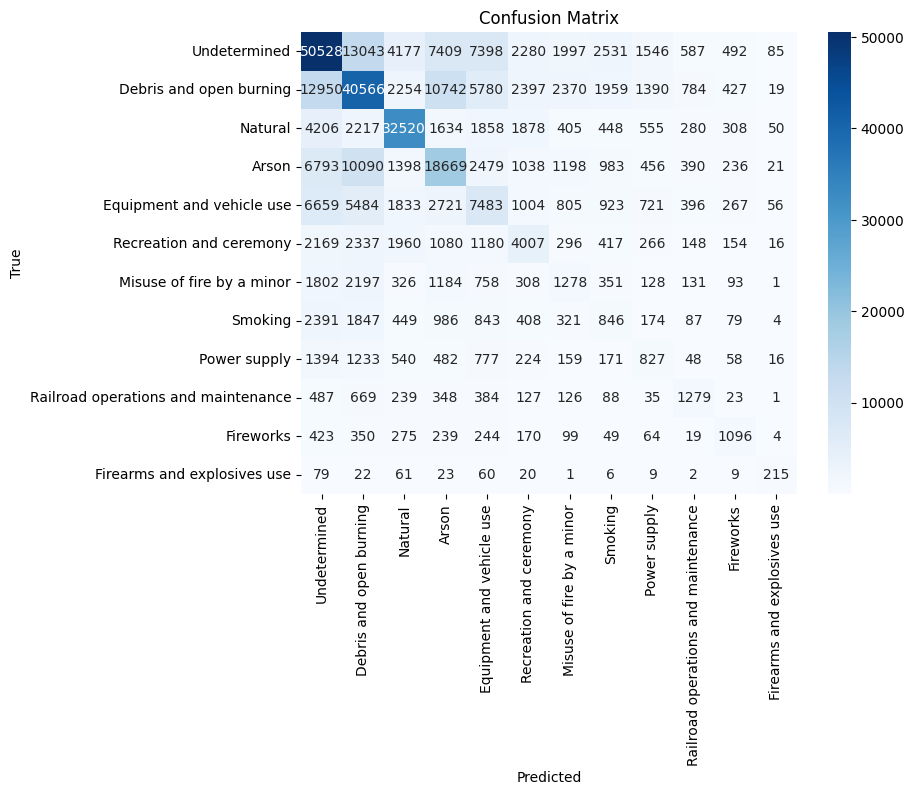

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Conclusion

I think the data makes more sense with the 'natural' and age columns removed, and the 'other' and 'undetermined' data combined.

I think it's worth keeping everything else separate until we run the more complex models, but definitely worth considering what else could be combined.

I think good options would be:
* Equipment and vehicle use, combined with 'power supply' and 'railroad operations' etc. (as infrastructure as you suggested)
* Fire arms and explosives use,
* Recreation & Ceremony, with Fireworks (and maybe smoking? this is sort of 'recreation'?)
* Misuse of fire by a minor into 'arson'

(However of course the more complex models may throw something else into the ring entirely, so we will see!)

In [ ]:
report2_df

,precision,recall,f1-score,support
Arson,0.410154,0.426710,0.418269,43751.000000
Debris and open burning,0.506727,0.496901,0.501766,81638.000000
Equipment and vehicle use,0.255882,0.263932,0.259844,28352.000000
Firearms and explosives use,0.440574,0.424063,0.432161,507.000000
Fireworks,0.338063,0.361478,0.349378,3032.000000
Misuse of fire by a minor,0.141137,0.149351,0.145128,8557.000000
Natural,0.706465,0.701482,0.703965,46359.000000
Power supply,0.134014,0.139484,0.136694,5929.000000
Railroad operations and maintenance,0.308119,0.336048,0.321478,3806.000000
Recreation and ceremony,0.289084,0.285602,0.287333,14030.000000


# Further Modelling on updated datasets

1. Data set without 'Undetermined'

2. Data set without 'undetermined' and combined some of the other areas

3. Data set with 'undetermined' but combined other areas

4. Data set with undersampling

5. Combined dataset of 2 or 3, with 4

In [6]:
# Creating dataset 1 - removing 'undetermined'
data_update = data
data_update = data_update.drop(['NWCG_CAUSE_CLASSIFICATION = _Human', 'NWCG_CAUSE_CLASSIFICATION = _Natural', 'NWCG_CAUSE_CLASSIFICATION = _undetermined',
                                      'NWCG_CAUSE_AGE_CATEGORY = _Adult or Natural', 'NWCG_CAUSE_AGE_CATEGORY = _Minor'], axis=1)
data_update['NWCG_GENERAL_CAUSE'] = data_update['NWCG_GENERAL_CAUSE'].replace({'Other causes': 'Undetermined', 'Undetermined': 'Undetermined'})

data_1 = data_update[data_update['NWCG_GENERAL_CAUSE']!= 'Undetermined']


In [7]:
data_1['NWCG_GENERAL_CAUSE'].value_counts()

Debris and open burning                405877
Natural                                231547
Arson                                  219102
Equipment and vehicle use              141487
Recreation and ceremony                 69984
Misuse of fire by a minor               43018
Smoking                                 42540
Power supply                            29661
Railroad operations and maintenance     19660
Fireworks                               15376
Firearms and explosives use              2423
Name: NWCG_GENERAL_CAUSE, dtype: int64

In [15]:
X1 = data_1.drop("NWCG_GENERAL_CAUSE", axis=1)
y1 = data_1["NWCG_GENERAL_CAUSE"]


X1_train, X1_test, y1_train, y1_test = train_test_split(X1,y1, test_size=0.2, shuffle=True, random_state=2)

dt1 = DecisionTreeClassifier()
dt1.fit(X1_train,y1_train)
dt1_predictions = dt1.predict(X1_test)
dt1_acc = accuracy_score(y1_test, dt1_predictions)
print(f"Decision Tree Accuracy Score: {dt1_acc}")

Decision Tree Accuracy Score: 0.5003870809183444


In [9]:
# Creating dataset 2 - removing undetermined and combining other categories
data_2 = data_update[data_update['NWCG_GENERAL_CAUSE']!= 'Undetermined']

# Combining Railroad, Power & Equipment/Vehicle
data_2['NWCG_GENERAL_CAUSE'] = data_2['NWCG_GENERAL_CAUSE'].replace({'Railroad operations and maintenance': 'Infrastructure-related causes',
                                                                          'Power supply': 'Infrastructure-related causes',
                                                                          'Equipment and vehicle use': 'Infrastructure-related causes'})

# I am going to drop 'firearms & explosives use' as they don't fit exactly
# into another category, and there's so relatively few of them
data_2 = data_2[data_2['NWCG_GENERAL_CAUSE']!='Firearms and explosives use']

# Combining FIreworks with Recreation & Ceremony
data_2['NWCG_GENERAL_CAUSE'] = data_2['NWCG_GENERAL_CAUSE'].replace({'Fireworks': 'Recreation and ceremony'})


<ipython-input-9-25c9cce4637e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2['NWCG_GENERAL_CAUSE'] = data_2['NWCG_GENERAL_CAUSE'].replace({'Railroad operations and maintenance': 'Infrastructure-related causes',


In [10]:
data_2['NWCG_GENERAL_CAUSE'].value_counts()

Debris and open burning          405877
Natural                          231547
Arson                            219102
Infrastructure-related causes    190808
Recreation and ceremony           85360
Misuse of fire by a minor         43018
Smoking                           42540
Name: NWCG_GENERAL_CAUSE, dtype: int64

In [16]:
X2 = data_2.drop("NWCG_GENERAL_CAUSE", axis=1)
y2 = data_2["NWCG_GENERAL_CAUSE"]


X2_train, X2_test, y2_train, y2_test = train_test_split(X2,y2, test_size=0.2, shuffle=True, random_state=2)

dt2 = DecisionTreeClassifier()
dt2.fit(X2_train,y2_train)
dt2_predictions = dt2.predict(X2_test)
dt2_acc = accuracy_score(y2_test, dt2_predictions)
print(f"Decision Tree Accuracy Score: {dt2_acc}")

Decision Tree Accuracy Score: 0.5131437999433616


In [11]:
# Creating dataset 3 - keeping 'undetermined' but combining other categories

# Creating dataset 2 - removing undetermined and combining other categories
data_3 = data_update

# Combining Railroad, Power & Equipment/Vehicle
data_3['NWCG_GENERAL_CAUSE'] = data_3['NWCG_GENERAL_CAUSE'].replace({'Railroad operations and maintenance': 'Infrastructure-related causes',
                                                                          'Power supply': 'Infrastructure-related causes',
                                                                          'Equipment and vehicle use': 'Infrastructure-related causes'})

# I am going to drop 'firearms & explosives use' as they don't fit exactly
# into another category, and there's so relatively few of them
data_3 = data_3[data_3['NWCG_GENERAL_CAUSE']!='Firearms and explosives use']

# Combining FIreworks with Recreation & Ceremony
data_3['NWCG_GENERAL_CAUSE'] = data_3['NWCG_GENERAL_CAUSE'].replace({'Fireworks': 'Recreation and ceremony'})


<ipython-input-11-e6e5a8eee11c>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_3['NWCG_GENERAL_CAUSE'] = data_3['NWCG_GENERAL_CAUSE'].replace({'Fireworks': 'Recreation and ceremony'})


In [12]:
data_3['NWCG_GENERAL_CAUSE'].value_counts()

Undetermined                     461666
Debris and open burning          405877
Natural                          231547
Arson                            219102
Infrastructure-related causes    190808
Recreation and ceremony           85360
Misuse of fire by a minor         43018
Smoking                           42540
Name: NWCG_GENERAL_CAUSE, dtype: int64

In [17]:
X3 = data_3.drop("NWCG_GENERAL_CAUSE", axis=1)
y3 = data_3["NWCG_GENERAL_CAUSE"]


X3_train, X3_test, y3_train, y3_test = train_test_split(X3,y3, test_size=0.2, shuffle=True, random_state=2)

dt3 = DecisionTreeClassifier()
dt3.fit(X3_train,y3_train)
dt3_predictions = dt3.predict(X3_test)
dt3_acc = accuracy_score(y3_test, dt3_predictions)
print(f"Decision Tree Accuracy Score: {dt3_acc}")

Decision Tree Accuracy Score: 0.48046930806228866


In [19]:
# Creating dataset 4 - undersampling from original categories, will 'undersample'
# during traintest split

data_4 = data_update

X4 = data_4.drop("NWCG_GENERAL_CAUSE", axis=1)
y4 = data_4["NWCG_GENERAL_CAUSE"]

rus = RandomUnderSampler(random_state=0)
X4_resampled, y4_resampled = rus.fit_resample(X4, y4)

X4_train, X4_test, y4_train, y4_test = train_test_split(X4_resampled,y4_resampled, test_size=0.2, shuffle=True, random_state=2)

dt4 = DecisionTreeClassifier()
dt4.fit(X4_train,y4_train)
dt4_predictions = dt4.predict(X4_test)
dt4_acc = accuracy_score(y4_test, dt4_predictions)
print(f"Decision Tree Accuracy Score: {dt4_acc}")

Decision Tree Accuracy Score: 0.3586463062319439


In [20]:
# Creating dataset 5 - undersampling using dataset 2 (removed 'undetermined' and combined some areas)

data_5 = data_2

X5 = data_5.drop("NWCG_GENERAL_CAUSE", axis=1)
y5 = data_5["NWCG_GENERAL_CAUSE"]

rus = RandomUnderSampler(random_state=0)
X5_resampled, y5_resampled = rus.fit_resample(X5, y5)

X5_train, X5_test, y5_train, y5_test = train_test_split(X5_resampled,y5_resampled, test_size=0.2, shuffle=True, random_state=2)

dt5 = DecisionTreeClassifier()
dt5.fit(X5_train,y5_train)
dt5_predictions = dt5.predict(X5_test)
dt5_acc = accuracy_score(y5_test, dt5_predictions)
print(f"Decision Tree Accuracy Score: {dt5_acc}")

Decision Tree Accuracy Score: 0.3910605144737726


In [22]:
accuracies = {"Set 1":dt1_acc, "Set 2":dt2_acc, "Set 3":dt3_acc,
                           "Set 4":dt4_acc,"Set 5":dt5_acc}
accuracies

{'Set 1': 0.5003870809183444,
 'Set 2': 0.5131437999433616,
 'Set 3': 0.48046930806228866,
 'Set 4': 0.3586463062319439,
 'Set 5': 0.3910605144737726}

In [23]:
predictions = pd.DataFrame({"Actual":y2_test, "DT":dt2_predictions})

In [24]:
predictions.head(30)

,Actual,DT
560544,Arson,Debris and open burning
1673199,Natural,Natural
763856,Misuse of fire by a minor,Smoking
195320,Recreation and ceremony,Natural
852163,Debris and open burning,Arson
1645513,Arson,Debris and open burning
844683,Arson,Infrastructure-related causes
483631,Debris and open burning,Arson
1255963,Infrastructure-related causes,Arson
381553,Arson,Arson


In [25]:
report_data2 = classification_report(y2_test, dt2_predictions, output_dict=True)
report_data2_df = pd.DataFrame(report_data2).transpose()

In [27]:
report_data2_df

,precision,recall,f1-score,support
Arson,0.461771,0.474135,0.467871,43882.000000
Debris and open burning,0.583325,0.569388,0.576272,81159.000000
Infrastructure-related causes,0.385949,0.391996,0.388949,37980.000000
Misuse of fire by a minor,0.157760,0.167536,0.162501,8440.000000
Natural,0.747915,0.739350,0.743608,46457.000000
Recreation and ceremony,0.356814,0.359568,0.358186,17229.000000
Smoking,0.136390,0.137112,0.136750,8504.000000
accuracy,0.513144,0.513144,0.513144,0.513144
macro avg,0.404275,0.405584,0.404877,243651.000000
weighted avg,0.515691,0.513144,0.514361,243651.000000


In [28]:
feature_importances_data2 = pd.DataFrame(
    dt2.feature_importances_,
    index =X2_train.columns,
    columns=['importance']
).sort_values('importance', ascending=False)

In [29]:
feature_importances_data2

,importance
ELEVATION,0.160932
TEMPERATURE,0.120679
DAY_OF_YEAR,0.113679
WIND_SPEED,0.104950
FIRE_SIZE,0.091242
PRECIPITATION,0.084135
FIRE_YEAR,0.070877
STATE,0.068786
COUNTY_STATE,0.066693
DAY_OF_WEEK,0.046828


# Testing also dropping NWCG_REPORTING_AGENCY

Dataset 6 = removal of 'undetermined' and some combination of other groups (dataset 2), removing NWCG_REPORTING_AGENCY

In [31]:
#Creating dataset 6

to_drop = ['NWCG_REPORTING_AGENCY = _State, County, or Local Organization',
           'NWCG_REPORTING_AGENCY = _Bureau of Land Management',
           'NWCG_REPORTING_AGENCY = _Bureau of Indian Affairs',
           'NWCG_REPORTING_AGENCY = _Forest Service',
           'NWCG_REPORTING_AGENCY = _Tribal Organization',
           'NWCG_REPORTING_AGENCY = _National Park Service',
           'NWCG_REPORTING_AGENCY = _Fish and Wildlife Service',
           'NWCG_REPORTING_AGENCY = _Department of Energy',
           'NWCG_REPORTING_AGENCY = _Department of Defense',
           'NWCG_REPORTING_AGENCY = _Bureau of Reclamation',
           'NWCG_REPORTING_AGENCY = _Interagency Organization']

data_6 = data_2.drop(to_drop, axis=1)

X6 = data_6.drop("NWCG_GENERAL_CAUSE", axis=1)
y6 = data_6["NWCG_GENERAL_CAUSE"]


X6_train, X6_test, y6_train, y6_test = train_test_split(X6,y6, test_size=0.2, shuffle=True, random_state=2)

dt6 = DecisionTreeClassifier()
dt6.fit(X6_train,y6_train)
dt6_predictions = dt6.predict(X6_test)
dt6_acc = accuracy_score(y6_test, dt6_predictions)
print(f"Decision Tree Accuracy Score: {dt6_acc}")

Decision Tree Accuracy Score: 0.5111983944248125


In [32]:
report_data6 = classification_report(y6_test, dt6_predictions, output_dict=True)
report_data6_df = pd.DataFrame(report_data6).transpose()

report_data6_df

,precision,recall,f1-score,support
Arson,0.459377,0.471970,0.465588,43882.000000
Debris and open burning,0.580280,0.567725,0.573934,81159.000000
Infrastructure-related causes,0.380569,0.386651,0.383586,37980.000000
Misuse of fire by a minor,0.158260,0.167299,0.162654,8440.000000
Natural,0.747308,0.737994,0.742622,46457.000000
Recreation and ceremony,0.363393,0.362528,0.362960,17229.000000
Smoking,0.132627,0.133937,0.133279,8504.000000
accuracy,0.511198,0.511198,0.511198,0.511198
macro avg,0.403116,0.404015,0.403518,243651.000000
weighted avg,0.513642,0.511198,0.512368,243651.000000


In [33]:
feature_importances_data6 = pd.DataFrame(
    dt6.feature_importances_,
    index =X6_train.columns,
    columns=['importance']
).sort_values('importance', ascending=False)

feature_importances_data6

,importance
ELEVATION,0.162608
TEMPERATURE,0.122620
DAY_OF_YEAR,0.111713
WIND_SPEED,0.105188
FIRE_SIZE,0.093137
PRECIPITATION,0.084495
FIRE_YEAR,0.070475
STATE,0.070184
COUNTY_STATE,0.066563
DAY_OF_WEEK,0.047318


In [34]:
# Just going to try dropping the owner_descr too...

owner_drop = ['OWNER_DESCR = _FOREST SERVICE',
              'OWNER_DESCR = _PRIVATE',
              'OWNER_DESCR = _NOT SPECIFIED',
              'OWNER_DESCR = _BUREAU OF INDIAN AFFAIRS',
              'OWNER_DESCR = _BUREAU OF LAND MANAGEMENT',
              'OWNER_DESCR = _STATE',
              'OWNER_DESCR = _FEDERAL',
              'OWNER_DESCR = _TRIBAL',
              'OWNER_DESCR = _NATIONAL PARK SERVICE',
              'OWNER_DESCR = _MUNICIPAL/LOCAL',
              'OWNER_DESCR = _FISH AND WILDLIFE SERVICE',
              'OWNER_DESCR = _COUNTY',
              'OWNER_DESCR = _BUREAU OF RECLAMATION',
              'OWNER_DESCR = _FOREIGN']

data_7 = data_6.drop(owner_drop, axis=1)

X7 = data_7.drop("NWCG_GENERAL_CAUSE", axis=1)
y7 = data_7["NWCG_GENERAL_CAUSE"]


X7_train, X7_test, y7_train, y7_test = train_test_split(X7,y7, test_size=0.2, shuffle=True, random_state=2)

dt7 = DecisionTreeClassifier()
dt7.fit(X7_train,y7_train)
dt7_predictions = dt7.predict(X7_test)
dt7_acc = accuracy_score(y7_test, dt7_predictions)
print(f"Decision Tree Accuracy Score: {dt7_acc}")

Decision Tree Accuracy Score: 0.4999979478844741


In [35]:
report_data7 = classification_report(y7_test, dt7_predictions, output_dict=True)
report_data7_df = pd.DataFrame(report_data7).transpose()

report_data7_df

,precision,recall,f1-score,support
Arson,0.447414,0.460781,0.453999,43882.000000
Debris and open burning,0.567394,0.555243,0.561253,81159.000000
Infrastructure-related causes,0.370825,0.375092,0.372947,37980.000000
Misuse of fire by a minor,0.147975,0.154147,0.150998,8440.000000
Natural,0.740718,0.736875,0.738791,46457.000000
Recreation and ceremony,0.331302,0.328168,0.329727,17229.000000
Smoking,0.129651,0.130292,0.129971,8504.000000
accuracy,0.499998,0.499998,0.499998,0.499998
macro avg,0.390754,0.391514,0.391098,243651.000000
weighted avg,0.501691,0.499998,0.500799,243651.000000


In [36]:
feature_importances_data7 = pd.DataFrame(
    dt7.feature_importances_,
    index =X7_train.columns,
    columns=['importance']
).sort_values('importance', ascending=False)

feature_importances_data7

,importance
ELEVATION,0.164272
TEMPERATURE,0.127353
DAY_OF_YEAR,0.120296
WIND_SPEED,0.112412
FIRE_SIZE,0.101175
PRECIPITATION,0.087658
FIRE_YEAR,0.076397
STATE,0.072987
COUNTY_STATE,0.068977
DAY_OF_WEEK,0.050480
